In [1]:
from ozclim import tools
import xarray as xr 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
from scipy import stats 

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# Open MDA8 O3 output for all three climate scenarios 

# Present-day
ref = tools.get_ensemble_ds("ref", "MDA8_O3")*1e9 # ppbv
refSNOx = tools.get_ensemble_ds("refSNOx", "MDA8_O3")*1e9 # ppbv

# Future-high
refshort = tools.get_ensemble_ds("refshort", "MDA8_O3")*1e9 # ppbv
refSNOxshort = tools.get_ensemble_ds("refSNOxshort", "MDA8_O3")*1e9 # ppbv

# Future-low
polshort = tools.get_ensemble_ds("pol3.7short", "MDA8_O3")*1e9 # ppbv
polSNOxshort = tools.get_ensemble_ds("pol3.7SNOxshort", "MDA8_O3")*1e9 # ppbv

['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w10_ref_c48.MDA8_O3.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w13_ref_c48.MDA8_O3.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w14_ref_c48.MDA8_O3.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w26_ref_c48.MDA8_O3.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w28_ref_c48.MDA8_O3.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w10_refSNOx_c48.MDA8_O3.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w13_refSNOx_c48.MDA8_O3.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w14_refSNOx_c48.MDA8_O3.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w26_refSNOx_c48.MDA8_O3.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w28_refSNOx_c48.MDA8_O3.nc4']
['/Users/emmie/Docum

In [3]:
# Define the relative ratio: (Base-LNOx) / (Base)
present_ratio = refSNOx/ref
future_ratio = refSNOxshort/refshort
futurepol_ratio = polSNOxshort/polshort

In [4]:
# Remove land
present_ratio_noland = tools.mask_ocean_c48(present_ratio)
future_ratio_noland = tools.mask_ocean_c48(future_ratio)
futurepol_ratio_noland = tools.mask_ocean_c48(futurepol_ratio)

In [5]:
# For each region, calculate the number of grid-box days per year where 
# (Base-LNOx) minus (Base) > 0 ===> (Base-LNOx)/(Base) > 1
# This means that MDA8 O3 *increases* relative to Base when NOx emissions are reduced

In [6]:
# Eastern North America: p, f, fp
region_num = 5

present_ratio_noland_region = tools.crop_regionmask_ar6_c48(present_ratio_noland, region_num)
future_ratio_noland_region = tools.crop_regionmask_ar6_c48(future_ratio_noland, region_num)  
futurepol_ratio_noland_region = tools.crop_regionmask_ar6_c48(futurepol_ratio_noland, region_num)

present = present_ratio_noland_region['SpeciesConc_O3'].isel(lev=0, region=0, drop=True)
future = future_ratio_noland_region['SpeciesConc_O3'].isel(lev=0, region=0, drop=True)
futurepol = futurepol_ratio_noland_region['SpeciesConc_O3'].isel(lev=0, region=0, drop=True)

present_NDD_annual = present.where(present > 1).resample(time='1Y').count(dim=['time','Ydim','Xdim', 'nf'])
future_NDD_annual = future.where(future > 1).resample(time='1Y').count(dim=['time','Ydim','Xdim', 'nf'])
futurepol_NDD_annual = futurepol.where(futurepol > 1).resample(time='1Y').count(dim=['time','Ydim','Xdim', 'nf'])

p = present_NDD_annual.values.flatten() # present
f = future_NDD_annual.values.flatten() # future-high
fp = futurepol_NDD_annual.values.flatten() # future-low

In [7]:
# West-Central Europe: p2, f2, fp2
region_num = 17

present_ratio_noland_region = tools.crop_regionmask_ar6_c48(present_ratio_noland, region_num)
future_ratio_noland_region = tools.crop_regionmask_ar6_c48(future_ratio_noland, region_num)  
futurepol_ratio_noland_region = tools.crop_regionmask_ar6_c48(futurepol_ratio_noland, region_num)

present = present_ratio_noland_region['SpeciesConc_O3'].isel(lev=0, region=0, drop=True)
future = future_ratio_noland_region['SpeciesConc_O3'].isel(lev=0, region=0, drop=True)
futurepol = futurepol_ratio_noland_region['SpeciesConc_O3'].isel(lev=0, region=0, drop=True)

present_NDD_annual = present.where(present > 1).resample(time='1Y').count(dim=['time','Ydim','Xdim', 'nf'])
future_NDD_annual = future.where(future > 1).resample(time='1Y').count(dim=['time','Ydim','Xdim', 'nf'])
futurepol_NDD_annual = futurepol.where(futurepol > 1).resample(time='1Y').count(dim=['time','Ydim','Xdim', 'nf'])

p2 = present_NDD_annual.values.flatten() # present
f2 = future_NDD_annual.values.flatten() # future-high
fp2 = futurepol_NDD_annual.values.flatten() # future-low

In [8]:
# Eastern Asia: p3, f3, fp3
region_num = 35

present_ratio_noland_region = tools.crop_regionmask_ar6_c48(present_ratio_noland, region_num)
future_ratio_noland_region = tools.crop_regionmask_ar6_c48(future_ratio_noland, region_num)  
futurepol_ratio_noland_region = tools.crop_regionmask_ar6_c48(futurepol_ratio_noland, region_num)

present = present_ratio_noland_region['SpeciesConc_O3'].isel(lev=0, region=0, drop=True)
future = future_ratio_noland_region['SpeciesConc_O3'].isel(lev=0, region=0, drop=True)
futurepol = futurepol_ratio_noland_region['SpeciesConc_O3'].isel(lev=0, region=0, drop=True)

present_NDD_annual = present.where(present > 1).resample(time='1Y').count(dim=['time','Ydim','Xdim', 'nf'])
future_NDD_annual = future.where(future > 1).resample(time='1Y').count(dim=['time','Ydim','Xdim', 'nf'])
futurepol_NDD_annual = futurepol.where(futurepol > 1).resample(time='1Y').count(dim=['time','Ydim','Xdim', 'nf'])

p3 = present_NDD_annual.values.flatten() # present
f3 = future_NDD_annual.values.flatten() # future-high
fp3 = futurepol_NDD_annual.values.flatten() # future-low

ENA Present:
4544
583
ENA Future-High:
5278
461
WCE: Present
5027
959
WCE: Future-High
5023
707
EAS: Present
28478
870
EAS: Future-High
27930
691
ENA: Future-Low
4441
426
WCE: Future-Low
4631
660
EAS: Future-Low
27579
681


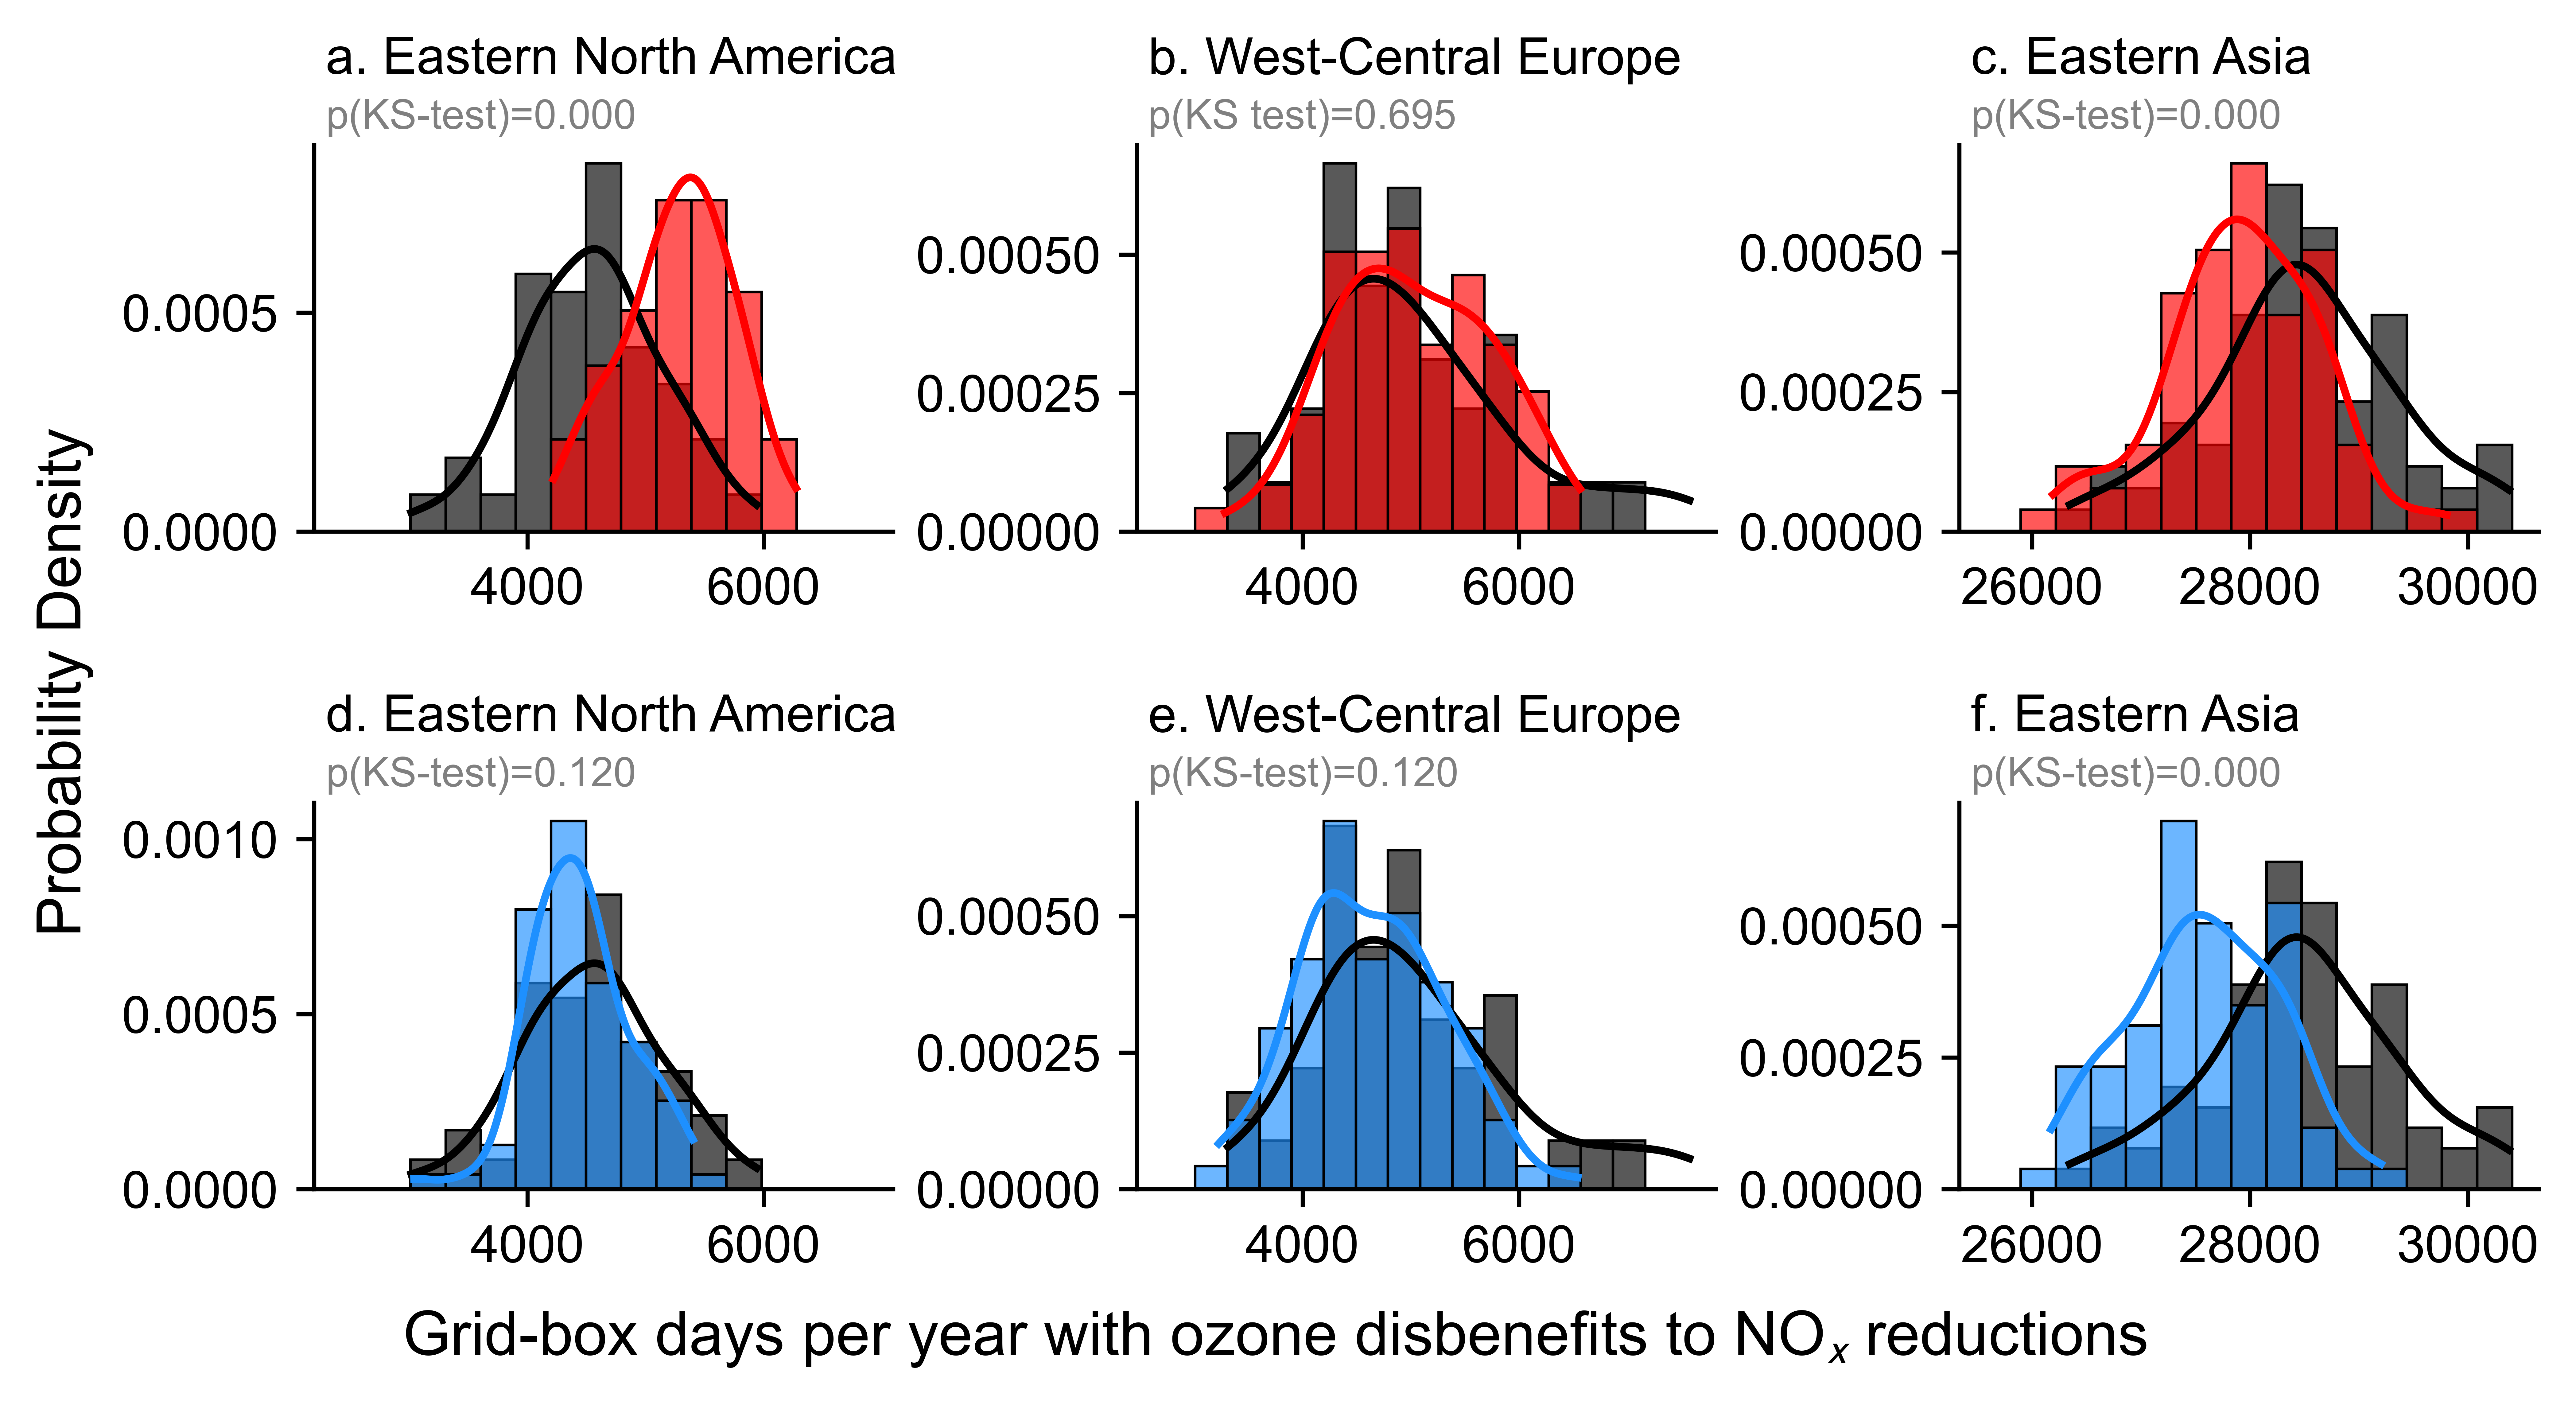

In [9]:
tools.set_matplotlib_font("Arial")
fig, ax = plt.subplots(
    figsize=(7, 3.8), 
    dpi=1200, 
    sharex=False, sharey=False,
    nrows=2, ncols=3,
    constrained_layout=True,
)
ax = ax.flatten()
titles= ["a. Eastern North America", "b. West-Central Europe", "c. Eastern Asia",
         "d. Eastern North America", "e. West-Central Europe", "f. Eastern Asia"]
ar6_region = {
        "ENA": 5,
        "WCE": 17,
        "EAS": 35,
    }

num_bins=15


# Index 0 = ENA p and f (present vs future-high)
min_val = np.concatenate([p]).min()-600
max_val = np.concatenate([f]).max()+600

hist1 = sns.histplot(p, bins=num_bins, binrange=[min_val, max_val],
                                stat="density", ax=ax[0], kde=True, color='black',
                                line_kws={'color': 'k'}, edgecolor="k", linewidth=0.5, alpha=0.65)
hist1 = sns.histplot(f, bins=num_bins, binrange=[min_val, max_val],
                                stat="density", ax=ax[0], kde=True, color='red',
                                line_kws={'color': 'r'}, edgecolor="k", linewidth=0.5, alpha=0.65)

# Print mean +/- std
print("ENA Present:") # Present
formatted_pmean = format(np.mean(p), ".0f")
formatted_pstd = format(np.std(p), ".0f")
print(formatted_pmean)
print(formatted_pstd)

print("ENA Future-High:") # Future-High    
formatted_fmean = format(np.mean(f), ".0f")
formatted_fstd = format(np.std(f), ".0f")
print(formatted_fmean)
print(formatted_fstd)

# Calculate p-val from KS-test
statistic, pval_ks = stats.ks_2samp(p, f)
formatted_pval_ks = format(pval_ks, ".3f")

ax[0].text(.02, 1.12, "p(KS-test)="+formatted_pval_ks, ha='left', va='top', transform=ax[0].transAxes, color='grey', fontsize=8)


# Index 1 = WCE p2 and f2 (present vs future-high)
min_val = np.concatenate([p2]).min()-600
max_val = np.concatenate([f2]).max()+600

hist1 = sns.histplot(p2, bins=num_bins, binrange=[min_val, max_val],
                                stat="density", ax=ax[1], kde=True, color='black',
                                line_kws={'color': 'k'}, edgecolor="k", linewidth=0.5, alpha=0.65)
hist1 = sns.histplot(f2, bins=num_bins, binrange=[min_val, max_val],
                                stat="density", ax=ax[1], kde=True, color='red',
                                line_kws={'color': 'r'}, edgecolor="k", linewidth=0.5, alpha=0.65)

# Print mean +/- std
print("WCE: Present") # Present
formatted_pmean = format(np.mean(p2), ".0f")
formatted_pstd = format(np.std(p2), ".0f")
print(formatted_pmean)
print(formatted_pstd)
            
print("WCE: Future-High") # Future-Hight
formatted_fmean = format(np.mean(f2), ".0f")
formatted_fstd = format(np.std(f2), ".0f")
print(formatted_fmean)
print(formatted_fstd)

# Calculate p-val from KS-test
statistic, pval_ks = stats.ks_2samp(p2, f2)
formatted_pval_ks = format(pval_ks, ".3f")

ax[1].text(.02, 1.12, "p(KS test)="+formatted_pval_ks, ha='left', va='top', transform=ax[1].transAxes, color='grey', fontsize=8)


# Index 2 = EAS p3 and f3 (present vs future-high)
min_val = np.concatenate([fp3]).min()-600 # min_val from future-low since that distribution is shifted left
max_val = np.concatenate([f3]).max()+600

hist1 = sns.histplot(p3, bins=num_bins, binrange=[min_val, max_val],
                                stat="density", ax=ax[2], kde=True, color='black',
                                line_kws={'color': 'k'}, edgecolor="k", linewidth=0.5, alpha=0.65)
hist1 = sns.histplot(f3, bins=num_bins, binrange=[min_val, max_val],
                                stat="density", ax=ax[2], kde=True, color='red',
                                line_kws={'color': 'red'}, edgecolor="k", linewidth=0.5, alpha=0.65)

# Print mean +/- std
print("EAS: Present") # Present
formatted_pmean = format(np.mean(p3), ".0f")
formatted_pstd = format(np.std(p3), ".0f")
print(formatted_pmean)
print(formatted_pstd)
            
print("EAS: Future-High") # Future-High
formatted_fmean = format(np.mean(f3), ".0f")
formatted_fstd = format(np.std(f3), ".0f")
print(formatted_fmean)
print(formatted_fstd)

# Calculate p-val from KS-test
statistic, pval_ks = stats.ks_2samp(p3, f3)
formatted_pval_ks = format(pval_ks, ".3f")

ax[2].text(.02, 1.12, "p(KS-test)="+formatted_pval_ks, ha='left', va='top', transform=ax[2].transAxes, color='grey', fontsize=8)

# Index 3 = ENA p and fp (present vs future-low)
min_val = np.concatenate([p]).min()-600
max_val = np.concatenate([f]).max()+600 # max_val from future-high since that distribution is shifted right

hist1 = sns.histplot(p, bins=num_bins, binrange=[min_val, max_val],
                                stat="density", ax=ax[3], kde=True, color='black',
                                line_kws={'color': 'k'}, edgecolor="k", linewidth=0.5, alpha=0.65)
hist1 = sns.histplot(fp, bins=num_bins, binrange=[min_val, max_val],
                                stat="density", ax=ax[3], kde=True, color='dodgerblue',
                                line_kws={'color': 'dodgerblue'}, edgecolor="k", linewidth=0.5, alpha=0.65)

# Print mean +/- std
print("ENA: Future-Low")
formatted_fpmean = format(np.mean(fp), ".0f")
formatted_fpstd = format(np.std(fp), ".0f")
print(formatted_fpmean)
print(formatted_fpstd)

# Calculate p-val from KS-test
statistic, pval_ks = stats.ks_2samp(p, fp)
formatted_pval_ks = format(pval_ks, ".3f")
ax[3].text(.02, 1.12, "p(KS-test)="+formatted_pval_ks, ha='left', va='top', transform=ax[3].transAxes, color='grey', fontsize=8)

# Index 4 = WCE p2 and fp2 (present vs future-low)
min_val = np.concatenate([p2]).min()-600
max_val = np.concatenate([f2]).max()+600 # max_val from future-high

hist1 = sns.histplot(p2, bins=num_bins, binrange=[min_val, max_val],
                                stat="density", ax=ax[4], kde=True, color='black',
                                line_kws={'color': 'k'}, edgecolor="k", linewidth=0.5, alpha=0.65)
hist1 = sns.histplot(fp2, bins=num_bins, binrange=[min_val, max_val],
                                stat="density", ax=ax[4], kde=True, color='dodgerblue',
                                line_kws={'color': 'dodgerblue'}, edgecolor="k", linewidth=0.5, alpha=0.65)

# Print mean +/- std
print("WCE: Future-Low")
formatted_fpmean = format(np.mean(fp2), ".0f")
formatted_fpstd = format(np.std(fp2), ".0f")
print(formatted_fpmean)
print(formatted_fpstd)

# Calculate p-val from KS-test
statistic, pval_ks = stats.ks_2samp(p2, fp2)
formatted_pval_ks = format(pval_ks, ".3f")
ax[4].text(.02, 1.12, "p(KS-test)="+formatted_pval_ks, ha='left', va='top', transform=ax[4].transAxes, color='grey', fontsize=8)

# Index 5 = EAS p3 and fp3 (present vs future-low)
min_val = np.concatenate([fp3]).min()-600 # min_val from fp3
max_val = np.concatenate([f3]).max()+600 # max_val from f3

hist1 = sns.histplot(p3, bins=num_bins, binrange=[min_val, max_val],
                                stat="density", ax=ax[5], kde=True, color='black',
                                line_kws={'color': 'k'}, edgecolor="k", linewidth=0.5, alpha=0.65)
hist1 = sns.histplot(fp3, bins=num_bins, binrange=[min_val, max_val],
                                stat="density", ax=ax[5], kde=True, color='dodgerblue',
                                line_kws={'color': 'dodgerblue'}, edgecolor="k", linewidth=0.5, alpha=0.65)

# Print mean +/- std
print("EAS: Future-Low")
formatted_fpmean = format(np.mean(fp3), ".0f")
formatted_fpstd = format(np.std(fp3), ".0f")
print(formatted_fpmean)
print(formatted_fpstd)

# Calculate p-val from KS-test
statistic, pval_ks = stats.ks_2samp(p3, fp3)
formatted_pval_ks = format(pval_ks, ".3f")
ax[5].text(.02, 1.12, "p(KS-test)="+formatted_pval_ks, ha='left', va='top', transform=ax[5].transAxes, color='grey', fontsize=8)

ax[0].spines[['right', 'top']].set_visible(False)
ax[1].spines[['right', 'top']].set_visible(False)
ax[2].spines[['right', 'top']].set_visible(False)
ax[3].spines[['right', 'top']].set_visible(False)
ax[4].spines[['right', 'top']].set_visible(False)
ax[5].spines[['right', 'top']].set_visible(False)

ax[0].set_ylabel(None)
ax[1].set_ylabel(None)
ax[2].set_ylabel(None)
ax[3].set_ylabel(None)
ax[4].set_ylabel(None)
ax[5].set_ylabel(None)

ax[0].text(.02, 1.28, titles[0], ha='left', va='top', transform=ax[0].transAxes, color='black', fontsize=10)
ax[1].text(.02, 1.28, titles[1], ha='left', va='top', transform=ax[1].transAxes, color='black', fontsize=10)
ax[2].text(.02, 1.28, titles[2], ha='left', va='top', transform=ax[2].transAxes, color='black', fontsize=10)
ax[3].text(.02, 1.28, titles[3], ha='left', va='top', transform=ax[3].transAxes, color='black', fontsize=10)
ax[4].text(.02, 1.28, titles[4], ha='left', va='top', transform=ax[4].transAxes, color='black', fontsize=10)
ax[5].text(.02, 1.28, titles[5], ha='left', va='top', transform=ax[5].transAxes, color='black', fontsize=10)

xlabel = "Grid-box days per year with ozone disbenefits to NO$_x$ reductions"
ylabel = "Probability Density"

fig.supylabel(ylabel, fontsize=12)
fig.supxlabel(xlabel, fontsize=12)
fig.tight_layout(pad=0.5, w_pad=1, h_pad=1)

plt.savefig("/Users/emmie/Documents/OZCLIM_local/figures/Figure4.png", format="png")